# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 601


In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

city = "Chicago"

city_url = query_url + city
city_weather = requests.get(city_url).json()
city_max_temp = city_weather['main']['temp_max']
city_humidity = city_weather['main']['humidity']
city_clouds = city_weather['clouds']['all']
city_wind = city_weather['wind']['speed']
city_country = city_weather['sys']['country']
city_date = city_weather['dt']
city_lat = city_weather['coord']['lat']
city_clouds

100

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | juegang
Processing Record 2 of Set 1 | monitos
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | ketchikan
Processing Record 6 of Set 1 | hawaiian paradise park
Processing Record 7 of Set 1 | sinabang
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | nadi
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | uturoa
Processing Record 12 of Set 1 | port mathurin
Processing Record 13 of Set 1 | margaret river
Processing Record 14 of Set 1 | reggane
Processing Record 15 of Set 1 | portland
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | anadyr
Processing Record 19 of Set 1 | stanley
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | kourou
Processing Record 22 of Set 1 | nema
Processing Record 23 

Processing Record 41 of Set 4 | le grau-du-roi
Processing Record 42 of Set 4 | mount gambier
Processing Record 43 of Set 4 | inyonga
Processing Record 44 of Set 4 | nemuro
Processing Record 45 of Set 4 | georgetown
Processing Record 46 of Set 4 | nishinoomote
Processing Record 47 of Set 4 | remire-montjoly
Processing Record 48 of Set 4 | bonthe
Processing Record 49 of Set 4 | itoman
Processing Record 0 of Set 5 | altai
Processing Record 1 of Set 5 | kavaratti
Processing Record 2 of Set 5 | riosucio
Processing Record 3 of Set 5 | sonsorol village
City not found. Skipping...
Processing Record 4 of Set 5 | port lincoln
Processing Record 5 of Set 5 | alotau
City not found. Skipping...
Processing Record 6 of Set 5 | huocheng
City not found. Skipping...
Processing Record 7 of Set 5 | pacific grove
Processing Record 8 of Set 5 | belel
Processing Record 9 of Set 5 | novoishimskiy
Processing Record 10 of Set 5 | brisas de zicatela
Processing Record 11 of Set 5 | lihue
Processing Record 12 of Se

Processing Record 28 of Set 8 | bac lieu
Processing Record 29 of Set 8 | khmelnytskyi
Processing Record 30 of Set 8 | nova olimpia
Processing Record 31 of Set 8 | buala
Processing Record 32 of Set 8 | hithadhoo
Processing Record 33 of Set 8 | kuta
Processing Record 34 of Set 8 | coro
Processing Record 35 of Set 8 | dhankuta
Processing Record 36 of Set 8 | molina
Processing Record 37 of Set 8 | constitucion
Processing Record 38 of Set 8 | anna regina
Processing Record 39 of Set 8 | pelabuhan klang
Processing Record 40 of Set 8 | lamu
Processing Record 41 of Set 8 | katutura
Processing Record 42 of Set 8 | abomsa
Processing Record 43 of Set 8 | port glaud
City not found. Skipping...
Processing Record 44 of Set 8 | whangarei
Processing Record 45 of Set 8 | gaiman
Processing Record 46 of Set 8 | bardai
Processing Record 47 of Set 8 | miquelon
Processing Record 48 of Set 8 | bethanie
Processing Record 49 of Set 8 | mar del plata
Processing Record 0 of Set 9 | tralee
Processing Record 1 of S

Processing Record 20 of Set 12 | zuru
Processing Record 21 of Set 12 | newark
Processing Record 22 of Set 12 | fort mcmurray
Processing Record 23 of Set 12 | magumeri
Processing Record 24 of Set 12 | saint-hubert
Processing Record 25 of Set 12 | chinde
Processing Record 26 of Set 12 | leer
Processing Record 27 of Set 12 | san jeronimo de juarez
Processing Record 28 of Set 12 | nieuw nickerie
Processing Record 29 of Set 12 | ruteng
Processing Record 30 of Set 12 | bratsk
Processing Record 31 of Set 12 | alice springs
Processing Record 32 of Set 12 | khairpur
Processing Record 33 of Set 12 | petoskey
Processing Record 34 of Set 12 | richards bay
Processing Record 35 of Set 12 | kempsey
Processing Record 36 of Set 12 | opuwo
Processing Record 37 of Set 12 | camarinas
Processing Record 38 of Set 12 | berdigestyakh
Processing Record 39 of Set 12 | haymana
Processing Record 40 of Set 12 | masaki-cho
Processing Record 41 of Set 12 | shouguang
Processing Record 42 of Set 12 | lensk
Processing 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,juegang,32.3174,121.1855,6.94,76,16,0.60,CN,1707567520
1,monitos,8.2500,-76.0500,24.50,89,71,2.23,CO,1707567520
2,grytviken,-54.2811,-36.5092,2.82,95,89,5.88,GS,1707567520
3,adamstown,-25.0660,-130.1015,25.43,88,100,12.57,PN,1707567520
4,ketchikan,55.3422,-131.6461,4.99,97,100,2.10,US,1707567520


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,juegang,32.3174,121.1855,6.94,76,16,0.60,CN,1707567520
1,monitos,8.2500,-76.0500,24.50,89,71,2.23,CO,1707567520
2,grytviken,-54.2811,-36.5092,2.82,95,89,5.88,GS,1707567520
3,adamstown,-25.0660,-130.1015,25.43,88,100,12.57,PN,1707567520
4,ketchikan,55.3422,-131.6461,4.99,97,100,2.10,US,1707567520


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

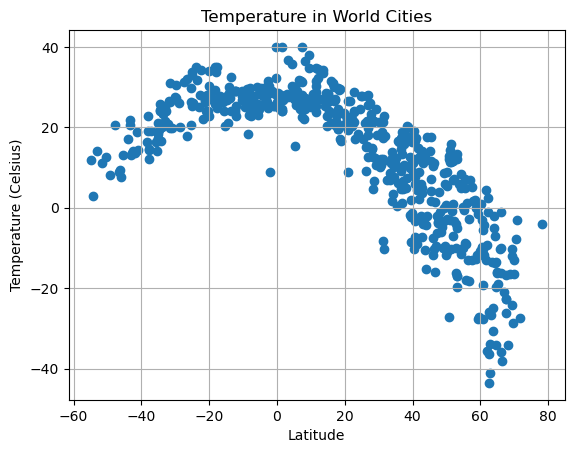

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

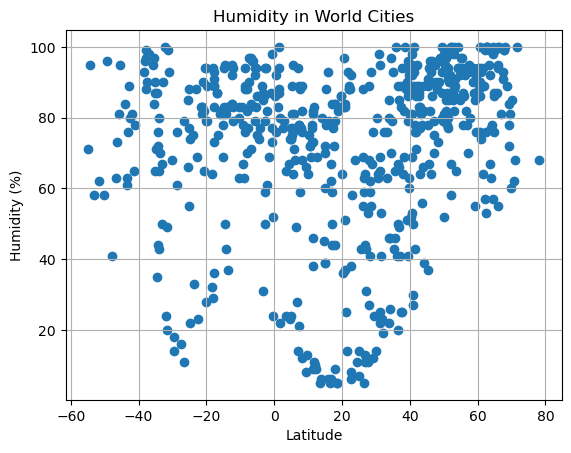

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

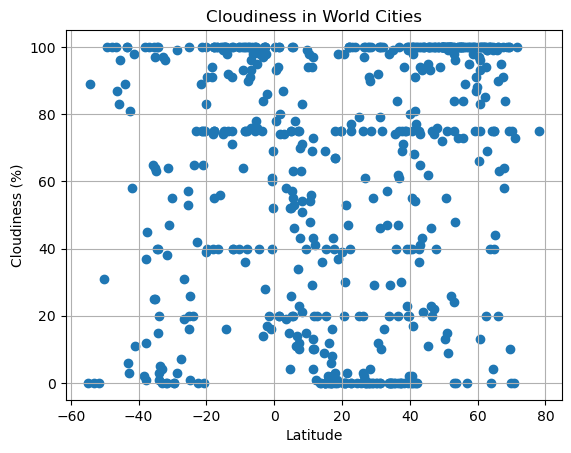

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

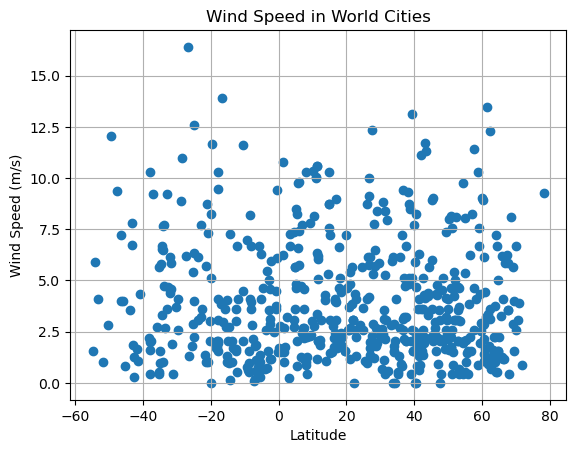

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def lin_reg_plot(x, y, xlabel, ylabel, title):
    correlation_matrix = np.corrcoef(x, y)
    correlation_coefficient = correlation_matrix[0, 1]
    print(f'The r-value is: {correlation_coefficient}')
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regression_line = slope * x + intercept
    equation = f" y = {slope}x + {intercept}"
    plt.scatter(x,y)
    plt.plot(x,regression_line, color='red')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.text(min(x), min(y), f" y = {slope:.2f}x + {intercept:.2f}", fontsize=20, color='red')
    plt.show()


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,juegang,32.3174,121.1855,6.94,76,16,0.60,CN,1707567520
1,monitos,8.2500,-76.0500,24.50,89,71,2.23,CO,1707567520
4,ketchikan,55.3422,-131.6461,4.99,97,100,2.10,US,1707567520
5,hawaiian paradise park,19.5933,-154.9731,20.57,86,75,1.54,US,1707567520
6,sinabang,2.4803,96.3801,27.74,77,87,3.23,ID,1707567521


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,grytviken,-54.2811,-36.5092,2.82,95,89,5.88,GS,1707567520
3,adamstown,-25.0660,-130.1015,25.43,88,100,12.57,PN,1707567520
7,port-aux-francais,-49.3500,70.2167,8.08,96,100,12.06,TF,1707567521
8,nadi,-17.8000,177.4167,27.00,89,75,2.06,FJ,1707567263
9,port alfred,-33.5906,26.8910,23.43,70,5,2.68,ZA,1707567396


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8676486365692982


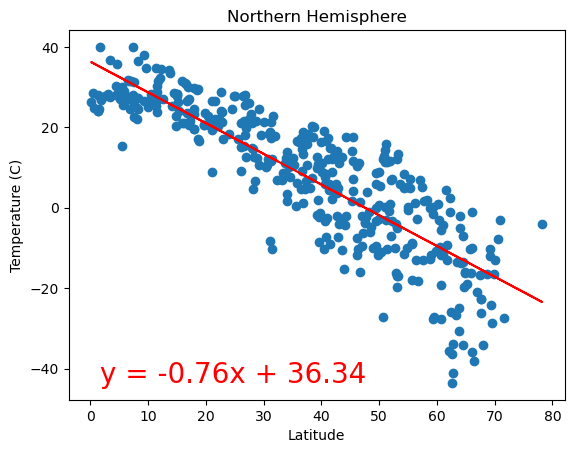

In [16]:
# Linear regression on Northern Hemisphere
lin_reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 
             'Latitude', 'Temperature (C)', 'Northern Hemisphere')

The r-value is: 0.6522647287866781


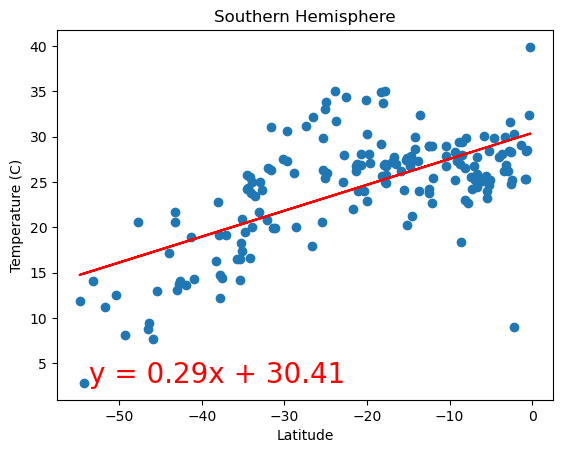

In [17]:
# Linear regression on Southern Hemisphere
lin_reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 
              'Latitude', 'Temperature (C)', 'Southern Hemisphere')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4011095593660195


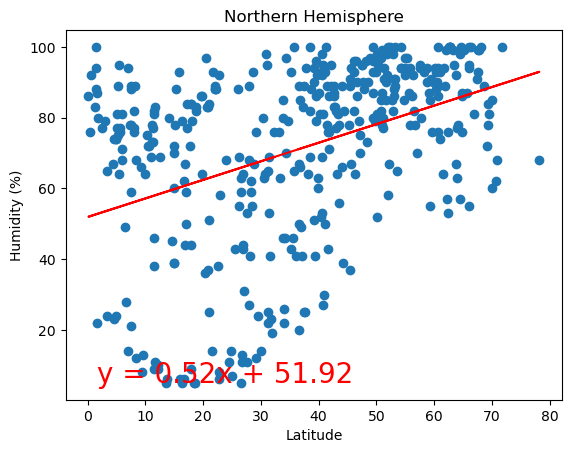

In [18]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 
             'Latitude', 'Humidity (%)', 'Northern Hemisphere')

The r-value is: 0.1078056756076754


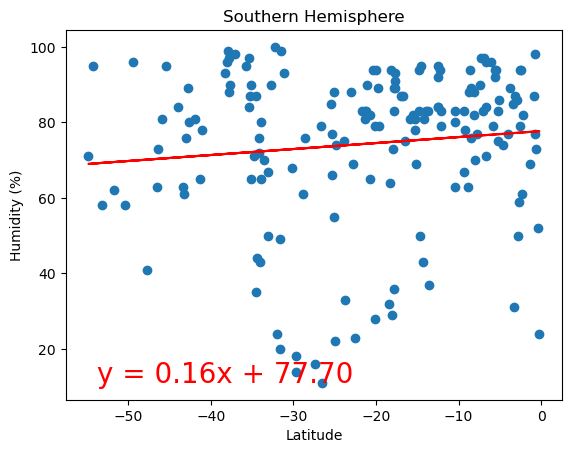

In [19]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 
              'Latitude', 'Humidity (%)', 'Southern Hemisphere')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.3621258720191726


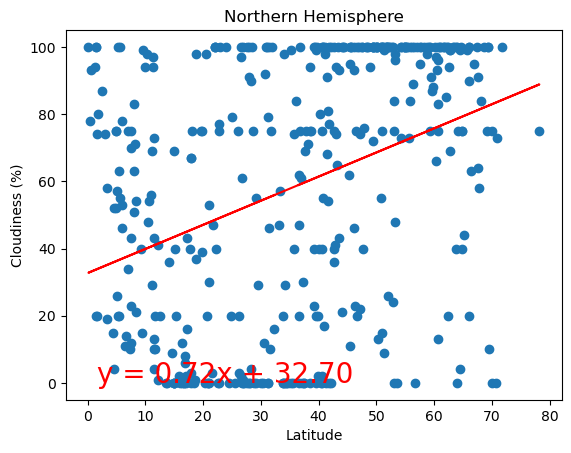

In [20]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 
             'Latitude', 'Cloudiness (%)', 'Northern Hemisphere')

The r-value is: 0.30233589396187316


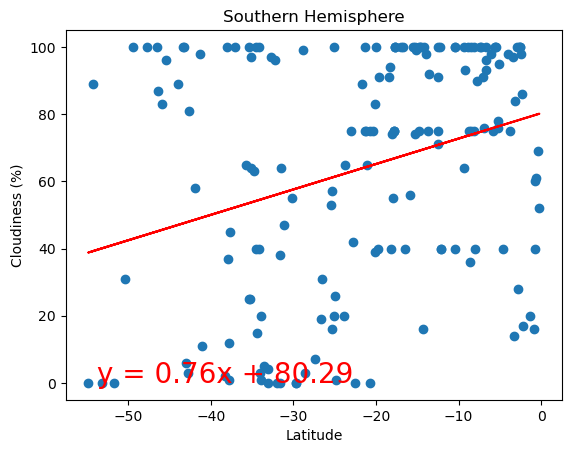

In [21]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 
              'Latitude', 'Cloudiness (%)', 'Southern Hemisphere')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.08381600604500475


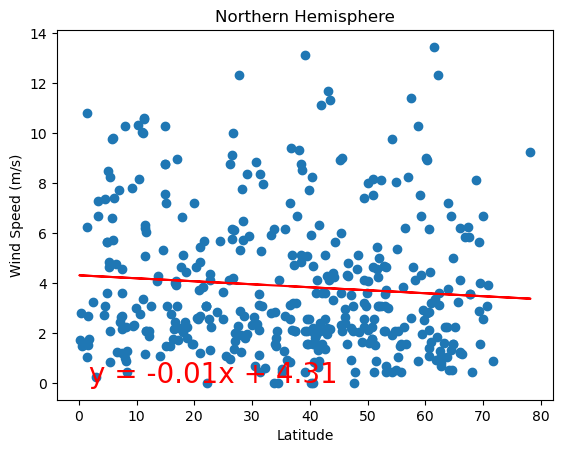

In [22]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 
             'Latitude', 'Wind Speed (m/s)', 'Northern Hemisphere')

The r-value is: -0.1503011503897194


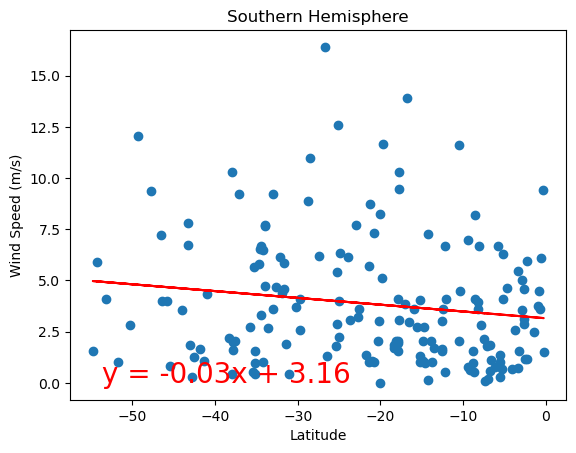

In [23]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 
              'Latitude', 'Wind Speed (m/s)', 'Southern Hemisphere')

**Discussion about the linear relationship:** YOUR RESPONSE HERE